# 导入第三方库

In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from random import *
from math import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib as mpl
import seaborn as sns

# 数据输入和准备

In [3]:
df=pd.read_csv("sintax_rdp.fixed.txt",sep="\t")
sample = df[["OTUID","label3"]]

import re
alldata = pd.DataFrame() 
for i in range(len(np.array(sample)[:,1])):
    result = re.split(",|:", np.array(sample)[:,1][i])
    result = [i.replace('"', '') for i in result]
    alldata = pd.DataFrame(pd.concat([alldata,np.transpose(pd.DataFrame(result))],axis=0))
alldata.index = sample["OTUID"]
alldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
OTUID,,,,,,,,,,,,,,
Otu1,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri
Otu3,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,s,Bacteroides_plebeius
Otu2,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,NaN,NaN
Otu4,d,Bacteria,p,Firmicutes,c,Clostridia,o,Clostridiales,f,Ruminococcaceae,g,Faecalibacterium,s,Faecalibacterium_prausnitzii
Otu5,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri


In [4]:
all_sample = alldata.iloc[:,np.arange(1,14,2)]
all_sample.columns = ["Kingdom","Phylum","Class","Order","Family","Genus","Species"]
all_sample.head()
# all_sample.to_csv("all_data_wuzhongxinxi.csv",index=1)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUID,,,,,,,
Otu1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri
Otu3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_plebeius
Otu2,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
Otu4,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,Faecalibacterium_prausnitzii
Otu5,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri


In [5]:
otu_label = pd.read_csv("otu_label_all0316.csv",header=0,index_col=0)
otu_label
label = otu_label["label"]
otu = otu_label.drop(["label"],axis=1)

In [6]:
Counter(label)
otu

,Otu133,Otu2,Otu159,Otu138,Otu37,Otu13,Otu26,Otu60,Otu4,Otu112,...,Otu317,Otu428,Otu439,Otu289,Otu336,Otu421,Otu481,Otu344,Otu469,Otu151
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,28.836548,5.255339,11.098433,0.493024,0.512401,1.952721,3.044265,0.234671,0.671719,0.344471,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR002,0.125912,11.829357,0.179265,0.049084,0.674378,0.554868,2.151180,0.264629,5.740749,3.877673,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR003,0.688369,4.867433,0.448550,0.066616,0.759426,2.447040,0.719456,0.346405,3.250877,0.548474,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR004,1.116356,3.435229,0.232262,0.198546,0.299693,0.816663,0.584401,0.382108,2.581104,0.348393,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR005,0.808314,5.688834,0.820097,0.103690,0.245086,0.332281,0.645709,4.357355,3.117783,0.282792,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,0.000000,3.941439,0.002198,0.065947,0.131894,0.162670,0.833132,0.028577,2.793959,0.048361,...,0.0,0.0,0.000000,0.052758,0.061551,0.0,0.00000,0.0,0.0,0.00000
XRK02,0.000000,0.545700,0.000000,0.002140,0.027820,0.064200,0.012840,0.000000,4.048878,0.012840,...,0.0,0.0,0.000000,8.844615,9.863254,0.0,0.00856,0.0,0.0,0.00214
XRK03,0.000000,19.314012,0.146350,0.030919,0.282393,0.505009,0.020613,0.049470,0.152533,0.350414,...,0.0,0.0,0.002061,0.037103,0.113369,0.0,0.01649,0.0,0.0,0.00000


In [7]:
map_otu = np.transpose(otu)
result_otu = pd.concat([all_sample["Genus"],map_otu],axis=1)
result_otu

,Genus,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Otu1,Prevotella,0.428436,0.687183,10.696363,1.146325,0.374700,0.378136,1.446560,1.499034,1.243503,...,2.619043,4.488453,4.915329,5.328752,7.756694,11.131872,17.430290,0.218494,10.627782,0.968851
Otu3,Bacteroides,2.478040,2.294165,9.779278,0.824155,0.355847,0.742686,0.821966,1.449939,0.944771,...,1.170665,2.480292,4.767341,1.741394,0.796964,0.340727,1.010079,0.657542,0.002051,0.985519
Otu2,Bacteroides,5.255339,11.829357,4.867433,3.435229,5.688834,6.790599,17.785939,6.179426,7.631029,...,11.296490,12.516824,11.001882,13.551292,5.135990,3.941439,0.545700,19.314012,1.927849,2.910720
Otu4,Faecalibacterium,0.671719,5.740749,3.250877,2.581104,3.117783,3.919482,3.800030,1.701961,5.314033,...,1.719681,1.709073,1.524281,1.455430,1.650854,2.793959,4.048878,0.152533,0.324043,0.056256
Otu5,Prevotella,1.018343,0.140851,3.082116,0.490747,0.136683,0.122272,0.727027,0.886983,1.352795,...,4.451945,11.305518,8.798968,5.369299,15.760067,0.076938,0.239680,0.076267,18.499149,1.871028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otu7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otu7348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otu7352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otu7353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
filter_otu = result_otu[result_otu["CR001"].isnull()==False]
filter_otu = filter_otu.fillna("unclassify")
filter_otu

,Genus,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Otu1,Prevotella,0.428436,0.687183,10.696363,1.146325,0.374700,0.378136,1.446560,1.499034,1.243503,...,2.619043,4.488453,4.915329,5.328752,7.756694,11.131872,17.430290,0.218494,10.627782,0.968851
Otu3,Bacteroides,2.478040,2.294165,9.779278,0.824155,0.355847,0.742686,0.821966,1.449939,0.944771,...,1.170665,2.480292,4.767341,1.741394,0.796964,0.340727,1.010079,0.657542,0.002051,0.985519
Otu2,Bacteroides,5.255339,11.829357,4.867433,3.435229,5.688834,6.790599,17.785939,6.179426,7.631029,...,11.296490,12.516824,11.001882,13.551292,5.135990,3.941439,0.545700,19.314012,1.927849,2.910720
Otu4,Faecalibacterium,0.671719,5.740749,3.250877,2.581104,3.117783,3.919482,3.800030,1.701961,5.314033,...,1.719681,1.709073,1.524281,1.455430,1.650854,2.793959,4.048878,0.152533,0.324043,0.056256
Otu5,Prevotella,1.018343,0.140851,3.082116,0.490747,0.136683,0.122272,0.727027,0.886983,1.352795,...,4.451945,11.305518,8.798968,5.369299,15.760067,0.076938,0.239680,0.076267,18.499149,1.871028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otu5563,Bacteroides,0.004306,0.032012,0.004441,0.022477,0.021209,0.006793,0.012492,0.019638,0.007286,...,0.012818,0.008545,0.014799,0.008536,0.004217,0.002198,0.000000,0.006184,0.000000,0.004167
Otu5571,Bacteroides,0.002153,0.002134,0.002221,0.000000,0.000000,0.002264,0.000000,0.000000,0.002429,...,0.014954,0.012818,0.014799,0.008536,0.008433,0.000000,0.000000,0.002061,0.000000,0.002084
Otu5737,Bacteroides,0.019377,0.008536,0.011103,0.007492,0.002357,0.049814,0.002498,0.006546,0.000000,...,0.010681,0.023500,0.033826,0.029877,0.002108,0.000000,0.000000,0.000000,0.002051,0.004167
Otu5767,Bacteroides,0.004306,0.006402,0.000000,0.000000,0.002357,0.002264,0.004997,0.006546,0.004857,...,0.002136,0.004273,0.000000,0.008536,0.000000,0.002198,0.000000,0.000000,0.004102,0.004167


In [9]:
otu_corr = pd.read_csv("importance-otu.csv")
otu_corr = otu_corr.head(60)
filter_otu = filter_otu[filter_otu.index.isin(otu_corr["OTUId"])]

In [10]:
# 按种求和
temp1 = list(set(filter_otu["Genus"]))
genus = pd.DataFrame(index=temp1,columns=otu.index)
for i in range(len(temp1)):
    temp2 = filter_otu[filter_otu["Genus"]==temp1[i]].drop(["Genus"],axis=1).sum(axis=0)
    genus.iloc[i,:] = temp2
genus.sum(axis=0)

Sample
CR001     9.892783
CR002    10.158351
CR003    19.762846
CR004    10.114632
CR005    15.862280
           ...    
XRK01    20.069904
XRK02    33.441760
XRK03     4.283300
XRK04    69.775836
XRK05    11.180331
Length: 987, dtype: float64

In [11]:
filter_otu.columns[filter_otu.dtypes != "object"]

Index(['CR001', 'CR002', 'CR003', 'CR004', 'CR005', 'CR006', 'CR007', 'CR008',
       'CR009', 'CR010',
       ...
       'XRJ06', 'XRJ07', 'XRJ08', 'XRJ09', 'XRJ10', 'XRK01', 'XRK02', 'XRK03',
       'XRK04', 'XRK05'],
      dtype='object', length=987)

In [12]:
genus = np.transpose(genus)

In [13]:
genus

,unclassify,Lachnospiracea_incertae_sedis,Clostridium_sensu_stricto,Anaerostipes,Prevotella,Clostridium_XlVa,Dialister,Bacteroides,Parabacteroides,Fusobacterium,Faecalibacterium,Roseburia,Blautia,Odoribacter,Barnesiella,Clostridium_XlVb,Alistipes,Romboutsia,Intestinibacter,Ruminococcus2
Sample,,,,,,,,,,,,,,,,,,,,
CR001,0.294953,0.0107647,0.0344471,0.0452118,1.65131,0.111953,0.370307,5.1563,0.00430589,1.3176,0.00430589,0.116259,0.0322942,0.144247,0.0150706,0.0990355,0.247589,0.0129177,0.0129177,0.210989
CR002,0.435358,0.0554868,0.0490845,0.00426821,1.05638,0.189936,0.0512186,6.36391,0.0490845,0.362798,0.0106705,0.337189,0.245422,0.219813,0,0.0704255,0.360664,0.0106705,0.0128046,0.273166
CR003,0.421903,0.0466314,0.0421903,0.0111027,14.0383,0.175423,0.0754985,2.97553,0.117689,0.319758,0.00666163,0.375272,0.0866012,0.233157,0.0111027,0.0888218,0.446329,0.0310876,0.0133233,0.24648
CR004,0.981494,0.0187308,0.108639,0.00374616,2.08661,0.247247,0.423316,3.39027,0.172323,0.183562,0.00374616,0.415824,0.101146,0.325916,0.0187308,0.232262,0.524462,0.0337154,0.0187308,0.824155
CR005,1.12881,0.0447754,0.2498,0.0164962,0.525522,0.787105,0.671631,2.40845,0.0212094,5.26229,0.0141396,0.772965,0.11076,0.673988,0,0.219164,0.879012,0.0424188,0.0212094,2.01254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,0.932052,0.00219824,0.0659471,0.0131894,14.3985,0.0109912,0,3.31054,0.0813348,0.0109912,0.00879295,0.270383,0.257194,0.083533,0.1253,0.0637489,0.107714,0.0197841,0.0109912,0.296762
XRK02,0.06206,0.0214,0.38306,0,32.4509,0.00214,0,0.14766,0.00856,0.06634,0,0.1177,0.08132,0.00214,0,0.00428,0.0321,0.02996,0.00214,0.02996
XRK03,0.80183,0,0.0309189,0.00206126,0.618378,0.0371027,0,2.0963,0.0103063,0.00824504,0,0.00618378,0.263841,0.0185513,0.00206126,0.00618378,0.226739,0.0329802,0.0103063,0.111308


In [14]:
label[label=="NM"] = "HI"
label[label=="CR"] = "CRC"

<ipython-input-14-780fcaa6a35b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="NM"] = "HI"
<ipython-input-14-780fcaa6a35b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="CR"] = "CRC"


In [15]:
result = pd.concat([label,genus],axis=1)
result
# result.to_csv("result.csv")

,label,unclassify,Lachnospiracea_incertae_sedis,Clostridium_sensu_stricto,Anaerostipes,Prevotella,Clostridium_XlVa,Dialister,Bacteroides,Parabacteroides,...,Faecalibacterium,Roseburia,Blautia,Odoribacter,Barnesiella,Clostridium_XlVb,Alistipes,Romboutsia,Intestinibacter,Ruminococcus2
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,CRC,0.294953,0.0107647,0.0344471,0.0452118,1.65131,0.111953,0.370307,5.1563,0.00430589,...,0.00430589,0.116259,0.0322942,0.144247,0.0150706,0.0990355,0.247589,0.0129177,0.0129177,0.210989
CR002,CRC,0.435358,0.0554868,0.0490845,0.00426821,1.05638,0.189936,0.0512186,6.36391,0.0490845,...,0.0106705,0.337189,0.245422,0.219813,0,0.0704255,0.360664,0.0106705,0.0128046,0.273166
CR003,CRC,0.421903,0.0466314,0.0421903,0.0111027,14.0383,0.175423,0.0754985,2.97553,0.117689,...,0.00666163,0.375272,0.0866012,0.233157,0.0111027,0.0888218,0.446329,0.0310876,0.0133233,0.24648
CR004,CRC,0.981494,0.0187308,0.108639,0.00374616,2.08661,0.247247,0.423316,3.39027,0.172323,...,0.00374616,0.415824,0.101146,0.325916,0.0187308,0.232262,0.524462,0.0337154,0.0187308,0.824155
CR005,CRC,1.12881,0.0447754,0.2498,0.0164962,0.525522,0.787105,0.671631,2.40845,0.0212094,...,0.0141396,0.772965,0.11076,0.673988,0,0.219164,0.879012,0.0424188,0.0212094,2.01254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,PL,0.932052,0.00219824,0.0659471,0.0131894,14.3985,0.0109912,0,3.31054,0.0813348,...,0.00879295,0.270383,0.257194,0.083533,0.1253,0.0637489,0.107714,0.0197841,0.0109912,0.296762
XRK02,PL,0.06206,0.0214,0.38306,0,32.4509,0.00214,0,0.14766,0.00856,...,0,0.1177,0.08132,0.00214,0,0.00428,0.0321,0.02996,0.00214,0.02996
XRK03,PL,0.80183,0,0.0309189,0.00206126,0.618378,0.0371027,0,2.0963,0.0103063,...,0,0.00618378,0.263841,0.0185513,0.00206126,0.00618378,0.226739,0.0329802,0.0103063,0.111308


In [16]:
list_custom = ['HI', 'PL', "NAA","AA","CRC"]

# 设置成“category”数据类型
result['label'] = result['label'].astype('category')
# inplace = True，使 recorder_categories生效
result['label'].cat.reorder_categories(list_custom, inplace=True)
# inplace = True，使 df生效
result.sort_values('label', inplace=True)
result

,label,unclassify,Lachnospiracea_incertae_sedis,Clostridium_sensu_stricto,Anaerostipes,Prevotella,Clostridium_XlVa,Dialister,Bacteroides,Parabacteroides,...,Faecalibacterium,Roseburia,Blautia,Odoribacter,Barnesiella,Clostridium_XlVb,Alistipes,Romboutsia,Intestinibacter,Ruminococcus2
Sample,,,,,,,,,,,,,,,,,,,,,
JK098,HI,7.30596,0.511278,0.573742,0.0740312,2.90573,0,0,2.29728,0.00694043,...,0.00462695,0.948525,0.666281,0.0300752,0.0115674,0.0624639,0.164257,0.821284,0.0624639,0.155003
JKC09,HI,0.952559,0.328612,0.0311974,0.0249579,3.16341,0.23918,0,12.3042,0.341091,...,0.0332772,0.174705,0.438843,0.035357,0.0124789,0.0166386,2.30028,0.0499158,0.0415965,0.0831929
JKC10,HI,1.435,0.464387,0.108775,0.0292856,42.8198,0.0104592,0,1.50193,0.00627549,...,0.0334693,0.464387,0.481121,0.0104592,0.00836733,0.0836733,0.0941324,0.0962242,0.0522958,0.244744
JKD01,HI,2.17111,0.7334,0.172442,0.016621,7.52722,0.0103881,0.00207762,0.887144,0.00415524,...,0.0706391,0.671071,0.30541,0.0103881,0.00415524,0.0457076,0.839358,0.101803,0.04363,0.126735
JKD02,HI,1.43135,0.573784,0.192642,0.0372856,3.00771,0.0911426,0.00207142,2.91449,0,...,0.039357,0.528213,0.225785,0.00207142,0.00414285,0.0455713,0.0745712,0.0807855,0.0310713,0.0890712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRC10,CRC,0.790946,0.0925575,0.0504859,0,50.1809,0.025243,0.00631074,1.8827,0.00631074,...,0.0294501,0.456477,0.0925575,0.0147251,0,0.0694181,0.349194,0.0441752,0.00420716,0.357609
CRC09,CRC,2.44662,0.445627,0.0389383,0.00216324,1.45153,0.0562442,0.0173059,15.0583,0.0237956,...,0.00432648,0.0562442,0.0670604,0.164406,0.0324486,0.0519177,4.84133,0.0259589,0,1.2179
CRC08,CRC,2.78794,0.206047,0.0420504,0.00210252,6.24448,0.0672806,0.0189227,1.60002,0.0483579,...,0.0420504,0.319583,0.130356,0.203944,0.0504605,0.126151,0.420504,0.0883058,0.00630756,0.435221


In [17]:
result.to_csv("result.csv")

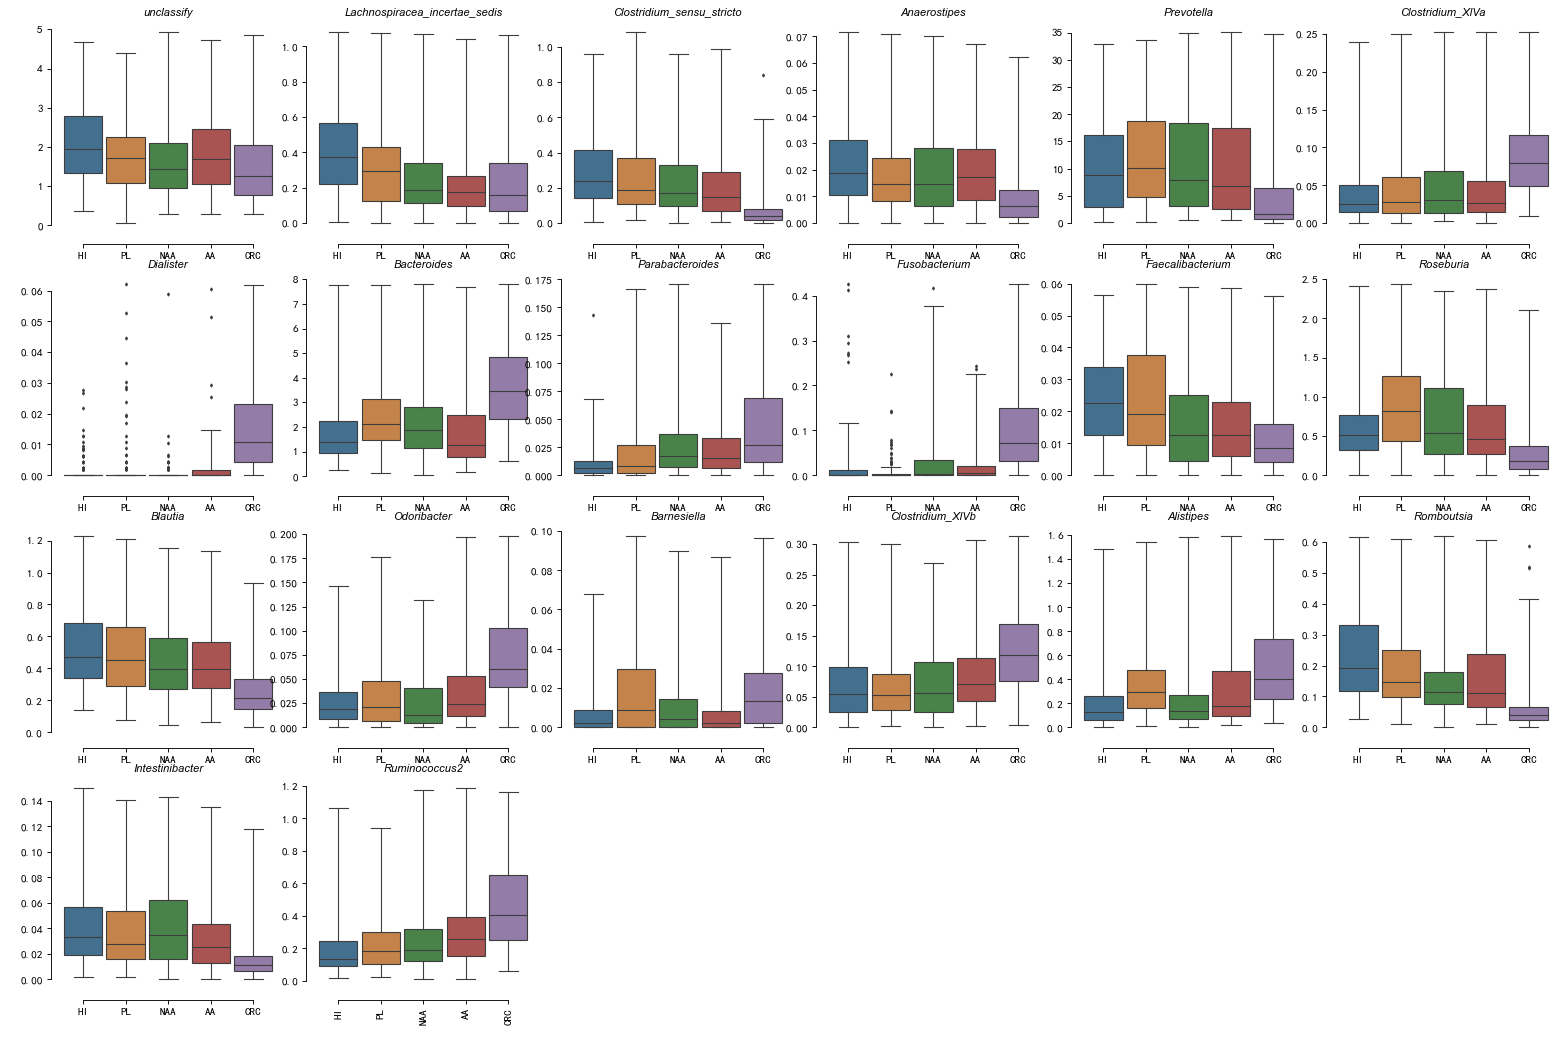

In [36]:
font1 = {'family':'Arial',
     'style':'italic',
'weight' : 'normal',
'size'   : 10,
}
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(24,16), dpi=80)
plt.figure(1)
for i in range(1,21):
    if i == 21:
        plt.subplot(4,6,i)
        result_otu = result[result.iloc[:,i] <= np.percentile(result.iloc[:,i],95)]
#         sns.boxplot(y = result_otu.columns[i], x='label', data=result_otu ,width=0.5 , linewidth = 1.0 ,fliersize=1)
        sns.boxplot(y = result_otu.columns[i], x='label', data=result_otu ,hue="label",width=0.5 , linewidth = 1.0 ,fliersize=1)
        
        sns.despine(offset=10, trim=True)
        plt.xticks(rotation=90)
    else: 
        plt.subplot(4,6,i)
        result_otu = result[result.iloc[:,i] <= np.percentile(result.iloc[:,i],95)]
        pig = sns.boxplot(y = result_otu.columns[i], x='label', data=result_otu ,width=0.9 , linewidth = 1 ,fliersize=2, saturation=0.5,whis=10)
        pig.set_title(result_otu.columns[i],fontdict=font1)
        pig.set_ylabel(" ")
        pig.set_xlabel(" ")
        sns.despine(offset=10, trim=True)
        plt.xticks(rotation=90)
# plt.savefig("zhong-all-lengde.svg",format="svg")


plt.savefig("zhong-all-lengde.svg", dpi=600,
                bbox_inches='tight', 
            )

Text(0, 0.5, 'raw_sample_var')

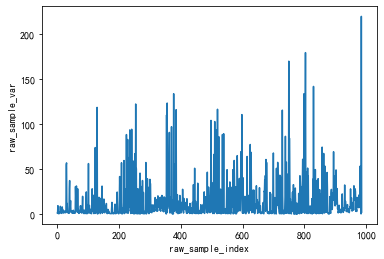

In [19]:
arr_var = np.var(genus,axis=1)
plt.plot(range(0,len(arr_var)),arr_var) 
plt.xlabel("raw_sample_index")
plt.ylabel("raw_sample_var")

In [20]:
result = pd.concat([label,genus],axis=1)

In [21]:
max_corr_index = []
max_corr =[]
for j in range(otu_corr.columns.size):
    corr = []
    for i in range(path.columns.size):
        t =np.corrcoef(path.iloc[:,i],otu_corr.iloc[:,j])[0][1]
        corr.append(t)
    max_corr_index.append(corr.index(max(corr, key = abs)))
    max_corr.append(max(corr))

NameError: name 'path' is not defined

In [17]:
path_corr = pd.DataFrame([path.columns[max_corr_index],max_corr])
path_corr.columns = otu_corr.columns
path_corr.index = ["path","corr_num"]
# path_corr.to_csv("path_corr.csv",index=1)

In [74]:
path_retu = path[list(set(np.transpose(path_corr)["path"]))]

In [75]:
path_retu

pathway,METH-ACETATE-PWY,ARGORNPROST-PWY,PWY-6876,PWY-7221,PWY-621,PWY-7374,SALVADEHYPOX-PWY,P162-PWY,PWY-5384,P124-PWY,P221-PWY,PWY-5532,P161-PWY,PWY-4984,P108-PWY
CR001,820.8988,1084.9857,31.9839,33815.1057,16704.1258,206.2526,7266.1926,13945.0010,9421.4257,2107.7964,261.5083,401.3480,10144.6327,8026.5172,29239.4479
CR002,1936.7726,957.9890,41.9601,37102.0436,19103.8371,256.0097,6779.6419,2222.8378,4441.1656,1835.5090,853.5551,264.5417,27052.8313,8327.5038,30197.4762
CR003,1545.9148,997.8472,35.9626,33691.7382,19475.9197,297.8553,6501.7673,2581.8452,5134.8313,1684.7980,362.5845,185.3751,16541.6143,6812.4339,27629.1467
CR004,1496.8657,1302.7280,51.9298,23250.7863,11215.9968,273.1382,6362.5429,1743.1882,4369.0054,3489.0764,174.1024,174.8867,10185.0654,3523.8033,16659.1164
CR005,2065.1843,2673.5818,139.6014,37476.7485,23588.1076,434.1846,11122.4056,6561.2995,7436.7098,5414.4749,610.5662,333.0610,14994.0654,7402.7290,27837.6989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,2282.6887,3561.4842,33.9763,31163.5876,25504.0790,275.0102,13036.8368,1290.0017,12048.9572,9387.7205,127.1719,643.3032,21939.4847,2053.9981,12907.4747
XRK02,516.2396,160.5157,135.3331,21626.7631,10891.8079,40.4929,762.8061,7908.0116,1052.6311,259.6735,130.8790,11.3334,5824.0495,741.3860,6930.5835
XRK03,1227.2690,567.0070,13.9937,39423.8075,20024.3500,73.7233,5007.3167,592.1065,7414.8586,3202.5408,11.9879,138.6395,11465.5370,4011.9803,37696.9310
XRK04,573.2252,372.1564,166.2250,17118.9228,10483.5991,223.3878,2659.6157,1232.8129,2006.2086,1153.9130,51.2517,23.7061,5153.3226,2712.5742,7038.5359


In [92]:
def retumatrix(path_retu,otu_corr):
    retu_matrix = pd.DataFrame(index=path_retu.columns,columns=otu_corr.columns)
    for j in range(otu_corr.columns.size):
        corr = []
        for i in range(path_retu.columns.size):
            t =np.corrcoef(path_retu.iloc[:,i],otu_corr.iloc[:,j])[0][1]
            corr.append(t)
        retu_matrix.iloc[:,j] = corr
    return retu_matrix

In [88]:
label_corr = pd.read_csv("PL-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_pl = otu_label[label_corr]

label_corr = pd.read_csv("NAA-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_naa = otu_label[label_corr]

label_corr = pd.read_csv("AA-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_aa = otu_label[label_corr]

label_corr = pd.read_csv("CR-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_cr = otu_label[label_corr]

In [94]:
retu_pl = retumatrix(path_retu,otu_pl)
retu_naa = retumatrix(path_retu,otu_naa)
retu_aa = retumatrix(path_retu,otu_aa)
retu_cr = retumatrix(path_retu,otu_cr)

In [16]:
retu_all = pd.concat([retu_pl,retu_naa,retu_aa,retu_cr],axis=1)

NameError: name 'retu_pl' is not defined

In [ ]:
#左侧颜色条
row_c = dict(zip(pd_iris['class'].unique(), ['green','yellow','pink']))
sns.clustermap(data=pd_iris,
               col_colors=pd_iris['class'].map(row_c), #行方向聚类用颜色区分不同类               
              )

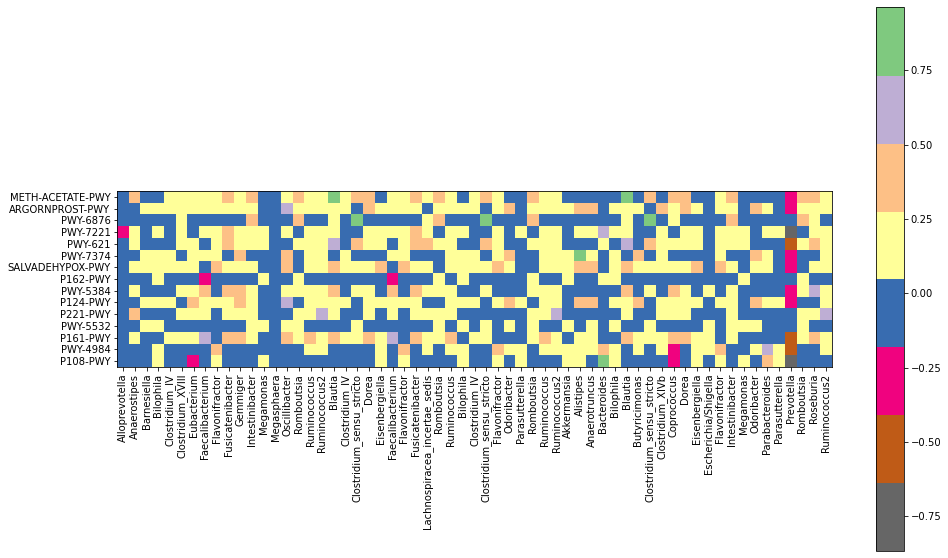

In [154]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(16,10))
    ind_x = cm.columns
    ind_y = cm.index
    x, y = np.meshgrid(len(ind_x),len(ind_y))
    plt.imshow(cm, interpolation='nearest',cmap="Accent_r")
    plt.colorbar()
    xlocations = np.array(range(len(ind_x)))
    ylocations = np.array(range(len(ind_y)))
    plt.xticks(xlocations, ind_x, rotation=90)
    plt.yticks(ylocations, ind_y)
#     plt.tight_layout(rect=[2,4,4,5])
    plt.savefig("retu-matrix.svg",format="svg")
plot_confusion_matrix(retu_all)

In [158]:
retu_aa

,Bilophila,Clostridium_IV,Clostridium_sensu_stricto,Flavonifractor,Odoribacter,Parasutterella,Romboutsia,Ruminococcus,Ruminococcus2
pathway,,,,,,,,,
METH-ACETATE-PWY,-0.076323,0.077760,0.331551,0.088310,-0.116068,-0.019896,0.289112,0.186878,0.062995
ARGORNPROST-PWY,0.173632,0.248548,0.019899,0.097169,0.420251,0.013140,0.072381,0.260015,0.251735
PWY-6876,-0.096082,0.010124,0.886829,-0.080960,-0.112808,-0.042221,0.320544,-0.003999,-0.085567
PWY-7221,0.104828,0.018707,0.037740,0.215108,0.027404,0.118652,-0.021815,0.174217,0.162335
PWY-621,-0.038037,0.019413,0.312628,0.069370,-0.100227,-0.045604,0.139779,0.098129,0.111037
PWY-7374,0.143070,0.074460,-0.112777,0.113276,0.303541,0.028289,-0.095540,0.120168,0.214877
SALVADEHYPOX-PWY,0.147895,0.179426,0.166948,0.283436,0.215760,0.042082,-0.034084,0.143492,0.135193
P162-PWY,0.055612,-0.086581,-0.000703,0.006128,-0.048728,-0.001659,0.081493,-0.139736,-0.033514
PWY-5384,-0.065282,0.044922,0.195758,-0.007339,-0.053108,-0.051428,0.071874,0.215307,0.063101
